# Time series clustering exercise

# Data

Download the census bureau business data for all years 1993-2014. You can investigate using the API (I have not done it with the census bureau). I did is as you see below

The data is on the github repo. Each file is the economic census for 1 year. 
Download it programmatically and move it to PUIdata

 Download the NYC zipcodes shapefile. One of many ways in which you can get the zipcodes shapefile for NYC
 https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip


## You can use zipfile module in python to unzip the files
it should be installed in your system, but if it is not you can get the code with wget from here
https://github.com/python/cpython/blob/2.7/Lib/zipfile.py
remembering to use the raw link
(or you can use the usual shell commands)

In [1]:
import pandas as pd
import zipfile 
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
import random
import datetime as dt
import os
import json
%pylab inline
import geopandas as gd
import sys
import glob
import seaborn as sbn
import scipy.stats
import shapely
import urllib
import requests 
from sklearn.cluster import KMeans


Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
os.chdir(os.getenv("PUIDATA"))
os.getcwd()

'/nfshome/ku373/PUIdata'

In [3]:
urllib.request.urlretrieve("https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp00totals.zip", "file00.zip")
urllib.request.urlretrieve("https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp01totals.zip", "file01.zip")
urllib.request.urlretrieve("https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp02totals.zip", "file02.zip")
urllib.request.urlretrieve("https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp03totals.zip", "file03.zip")
urllib.request.urlretrieve("https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp04totals.zip", "file04.zip")
urllib.request.urlretrieve("https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp05totals.zip", "file05.zip")
urllib.request.urlretrieve("https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp06totals.zip", "file06.zip")
urllib.request.urlretrieve("https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp07totals.zip", "file07.zip")
urllib.request.urlretrieve("https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp08totals.zip", "file08.zip")
urllib.request.urlretrieve("https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp09totals.zip", "file09.zip")
urllib.request.urlretrieve("https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp10totals.zip", "file10.zip")
urllib.request.urlretrieve("https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp11totals.zip", "file11.zip")
urllib.request.urlretrieve("https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp12totals.zip", "file12.zip")
urllib.request.urlretrieve("https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp13totals.zip", "file13.zip")
urllib.request.urlretrieve("https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp14totals.zip", "file14.zip")
urllib.request.urlretrieve("https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp94totals.zip", "file94.zip")
urllib.request.urlretrieve("https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp95totals.zip", "file95.zip")
urllib.request.urlretrieve("https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp96totals.zip", "file96.zip")
urllib.request.urlretrieve("https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp97totals.zip", "file97.zip")
urllib.request.urlretrieve("https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp98totals.zip", "file98.zip")
urllib.request.urlretrieve("https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp99totals.zip", "file99.zip")


('file99.zip', <http.client.HTTPMessage at 0x7f33e1f8e550>)

In [4]:
os.getcwd()

'/nfshome/ku373/PUIdata'

In [5]:
os.system("unzip " "file00.zip")
os.system("unzip " "file01.zip")
os.system("unzip " "file02.zip")
os.system("unzip " "file03.zip")
os.system("unzip " "file04.zip")
os.system("unzip " "file05.zip")
os.system("unzip " "file06.zip")
os.system("unzip " "file07.zip")
os.system("unzip " "file08.zip")
os.system("unzip " "file09.zip")
os.system("unzip " "file10.zip")
os.system("unzip " "file11.zip")
os.system("unzip " "file12.zip")
os.system("unzip " "file13.zip")
os.system("unzip " "file14.zip")

os.system("unzip " "file94.zip")
os.system("unzip " "file95.zip")
os.system("unzip " "file96.zip")
os.system("unzip " "file97.zip")
os.system("unzip " "file98.zip")
os.system("unzip " "file99.zip")


256

In [6]:
df00 = pd.read_csv('zbp00totals.txt')
df01 = pd.read_csv('zbp01totals.txt')
df02 = pd.read_csv('zbp02totals.txt')
df03 = pd.read_csv('zbp03totals.txt')
df04 = pd.read_csv('zbp04totals.txt')
df05 = pd.read_csv('zbp05totals.txt')
df06 = pd.read_csv('zbp06totals.txt')
df07 = pd.read_csv('zbp07totals.txt')
df08 = pd.read_csv('zbp08totals.txt')
df09 = pd.read_csv('zbp09totals.txt')
df10 = pd.read_csv('zbp10totals.txt')
df11 = pd.read_csv('zbp11totals.txt')
df12 = pd.read_csv('zbp12totals.txt')
df13 = pd.read_csv('zbp13totals.txt')
df14 = pd.read_csv('zbp14totals.txt')

df94 = pd.read_csv('zbp94totals.txt')
df95 = pd.read_csv('zbp95totals.txt')
df96 = pd.read_csv('zbp96totals.txt')
df97 = pd.read_csv('zbp97totals.txt')
df98 = pd.read_csv('zbp98totals.txt')
df99 = pd.read_csv('zbp99totals.txt')


In [7]:
'''df9914 = pd.concat([df00,df01,df02,df03,df04,df05,df06,df07,df08,df09,df10,df11,df12
          ,df13,df14,df94,df95,df96,df97,df98,df99])'''

'df9914 = pd.concat([df00,df01,df02,df03,df04,df05,df06,df07,df08,df09,df10,df11,df12\n          ,df13,df14,df94,df95,df96,df97,df98,df99])'

In [8]:
# Rename columns

In [9]:
df00.rename(columns={'ZIP': 'zip','EST':'est00'},inplace=True)
df01.rename(columns={'ZIP': 'zip','EST':'est01'},inplace=True)
df02.rename(columns={'ZIP': 'zip','EST':'est02'},inplace=True)
df99.rename(columns={'ZIP': 'zip','EST':'est99'},inplace=True)
df98.rename(columns={'ZIP': 'zip','EST':'est98'},inplace=True)

df97.rename(columns={'ZIP': 'zip','est':'est97'},inplace=True)
df96.rename(columns={'ZIP': 'zip','est':'est96'},inplace=True)
df95.rename(columns={'ZIP': 'zip','est':'est95'},inplace=True)
df94.rename(columns={'ZIP': 'zip','est':'est94'},inplace=True)

df03.rename(columns={'est':'est03'},inplace=True)
df04.rename(columns={'est':'est04'},inplace=True)
df05.rename(columns={'est':'est05'},inplace=True)
df06.rename(columns={'est':'est06'},inplace=True)
df07.rename(columns={'est':'est07'},inplace=True)
df08.rename(columns={'est':'est08'},inplace=True)
df09.rename(columns={'est':'est09'},inplace=True)
df10.rename(columns={'est':'est10'},inplace=True)
df11.rename(columns={'est':'est11'},inplace=True)
df12.rename(columns={'est':'est12'},inplace=True)
df13.rename(columns={'est':'est13'},inplace=True)
df14.rename(columns={'est':'est14'},inplace=True)

In [10]:
df00.index = df00.zip
df01.index = df01.zip
df02.index = df02.zip
df03.index = df03.zip
df04.index = df04.zip
df05.index = df05.zip
df06.index = df06.zip
df07.index = df07.zip
df08.index = df08.zip
df09.index = df09.zip
df10.index = df10.zip
df11.index = df11.zip
df12.index = df12.zip
df13.index = df13.zip
df14.index = df14.zip

df94.index = df94.zip
df95.index = df95.zip
df96.index = df96.zip
df97.index = df97.zip
df98.index = df98.zip
df99.index = df99.zip

In [11]:
jlist = [df01,df02,df03,df04,df05,df06,df07,df08,df09,df10,df11,df12,df13,df14,
        df94,df95,df96,df97,df98,df99]

dfm = df00.join(jlist)

In [12]:
dfms = dfm[['est00','est01','est02','est03','est04','est05','est06','est07','est08'
           ,'est09','est10','est11','est12','est13','est14',
           'est94','est95','est96','est97','est98','est99']] 

In [13]:
dfms.head()

,est00,est01,est02,est03,est04,est05,est06,est07,est08,est09,...,est11,est12,est13,est14,est94,est95,est96,est97,est98,est99
zip,,,,,,,,,,,,,,,,,,,,,
501,1.0,6.0,11.0,7.0,8.0,2.0,8.0,5.0,3.0,2.0,...,2.0,2.0,2.0,4.0,NaN,2.0,4.0,4.0,3.0,2.0
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,11.0,8.0,NaN,NaN
1001,493.0,490.0,490.0,505.0,500.0,509.0,509.0,503.0,477.0,458.0,...,436.0,453.0,439.0,458.0,439.0,439.0,433.0,457.0,444.0,469.0
1002,563.0,587.0,566.0,586.0,584.0,589.0,582.0,596.0,584.0,571.0,...,558.0,572.0,572.0,560.0,450.0,467.0,487.0,500.0,490.0,558.0
1003,13.0,13.0,15.0,16.0,15.0,12.0,12.0,16.0,17.0,16.0,...,16.0,15.0,15.0,18.0,10.0,10.0,13.0,15.0,14.0,13.0


In [14]:
# get zipcode
urllib.request.urlretrieve("https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip",
                           "zipcode.zip")

('zipcode.zip', <http.client.HTTPMessage at 0x7f33dd230f28>)

In [15]:
os.system("unzip " "zipcode.zip")

256

# Data cleaning

you may need to clean your data: for some NYC zip codes there may be no info
sanity check: you should have 20 (N_timestamps) datapoints per time series and about 250 zipcodes (Nzipcodes)


IMPORTANT: read the instructions below on pre-processing. Afte rthat:

mydata.shape should be (Nzipcodes, Ntimestamps)

mydata[i].std() shoould be 1 for all i in range(len(Nzipcodes))

mydata[i].mean() should be ~0 for all i in range(len(Nzipcodes))



## TASKS:
    
    1. get and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means
    in **a few** clusters (as discussed there is no real good, sound way to 
    decide what a good number is here. try a few options, keeping in mind 
    a few is more than a couple, but i recommand you stay within the 
    single digit numbers)
    
    3. plot the cluster centers (if you used K means those are the means of 
    the clusters). you can plot for example the cluster centers overlayed on 
    each time series (using the alpha channel to control the opacity in the 
    plot may be helpful here).
    
    4. Use another clustering algorithm (of your choice)
    
    5. overlay your data on a NYC map: you can use shapefiles for the 
    zip codes and different colors for different clusters
    
    6. Compare the results of the 2 algorithms
    
    7. attempt an interpretation. this is dangerous ground: clustering is 
    an exploratory tool so you do not want to jump to conclusions because 
    you see some clusters! but seeing structure in your data can inform 
    your next moves as an investigator. 
    

Note on preprocessing: the preparation of these data should include the "standardization" of the time seris. 
*Always when you apply a moachine learning model you should standardize the data or whiten it.*
These operations may be complicated preprocessing operation, they can for example invoke PCA, and they are aimed at removing covariance in the feature space.

The simplest version of whitening *standardizes each feature*" from every column (feature) you subtract the mean and you divide it by the standard deviation.

But the time series preprocessing is different if you want to use each time stamp as feature: because you want to maintain the coherence of the data, i.e. you **do not want** to treat each feature as an independent feature! the pattenrs in the time series are what you are clustering on (time series goes up and down, creating a pattern) and those patterns would be lost by whitening.

*So when you cluster or otherwise use a time series in a model, using each timestamp as a feature, you want to standardize the observations, not the features.* 

**From each row of your table (observation, in this case each zipcode) subtract the mean and you divide the row by the standard deviation.**

In [16]:
import geopandas as gp
nyczipsshp = gp.read_file(os.getenv("PUIDATA") + "/ZIP_CODE_040114.shp")
#nyczipsshp.plot()
#nyczipsshp.drop_duplicates("ZIPCODE").plot()
#nyczipsshp
print("ZIPCODES:",
      len(np.unique(nyczipsshp.ZIPCODE)), "POLYGONS:",
      len(nyczipsshp.ZIPCODE),
      "the difference is due to island with same zip as parts of land,",
      "but disjoint shapes")
nyczips = nyczipsshp.ZIPCODE.values.astype(int)
print("number of NYC zip codes:", len(nyczips))

ZIPCODES: 248 POLYGONS: 263 the difference is due to island with same zip as parts of land, but disjoint shapes
number of NYC zip codes: 263


In [17]:
a = list(nyczips)
cbs = dfms.loc[a]

In [18]:
# 20 years of data and 263 zipcodes
cbs.shape

(263, 21)

In [19]:
cleancsb = cbs.dropna(inplace=False)

In [20]:
#cleaning all missing values
cleancsb.shape

(243, 21)

In [21]:
#then the standardization will look like:
vals = ((cleancsb.T - cleancsb.mean(1)) / cleancsb.std(1)).T

In [22]:
vals.mean(axis=1).describe()

count    2.430000e+02
mean    -2.373746e-17
std      6.060337e-16
min     -2.410770e-15
25%     -2.669822e-16
50%     -1.453863e-17
75%      2.431917e-16
max      3.433100e-15
dtype: float64

In [23]:
vals.mean(axis=1).shape

(243,)

In [24]:
vals.std(axis=1).describe()

count    2.430000e+02
mean     1.000000e+00
std      1.065749e-16
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
dtype: float64

In [25]:
vals.std(axis=1).shape

(243,)

vals.mean(axis=1) should return 0 (or something very small) everywhere

vals.mean(axis=1).shape should be (260,)

vals.std(axis=1) should return 1 everywhere

vals.std(axis=1).shape

In [26]:
#cluster with kmeans
nc = 5
km = KMeans(n_clusters=nc, random_state=444).fit(vals)

In [27]:
#each observation in the km object has a label: 
#that is the cluster assigned to that observation
km.labels_.shape

(243,)

### The map of the clusters may look something like this

In [28]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 0, 3,
       0, 3, 0, 0, 4, 4, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 3, 3, 1, 3, 0, 3, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 1, 3, 3, 4, 0, 4, 0, 3, 0, 0, 3, 0, 3,
       3, 2, 4, 0, 0, 1, 0, 1, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 0, 3, 2, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3, 3, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 2, 0, 0,
       0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 3, 1,
       1, 2, 0, 1, 0, 1, 0, 2, 3, 0, 0, 4, 1, 2, 2, 1, 2, 4, 3, 1, 2, 1, 0,
       1, 1, 0, 2, 2, 0, 1, 2, 4, 1, 1, 2, 2, 2, 1, 1, 2, 2, 3, 2, 4, 2, 1,
       1, 1, 2, 3, 0, 3, 0, 4, 4, 0, 0, 4, 3], dtype=int32)

In [29]:
#df_index = pd.DataFrame([[km.labels_], [vals.index.values]],columns=['col1', 'col2'])
labelzip = pd.DataFrame(data=[km.labels_, vals.index.values],index=['label','ZIPCODE']).T

In [30]:
nyczipsshp['ZIPCODE'] = nyczipsshp['ZIPCODE'].astype(np.int64)

Create df for timeseries graph

In [31]:
valsr = vals.reset_index()
valsr.rename(columns={'zip': 'ZIPCODE'},inplace=True)

valsr = valsr.ix[:,['est94','est95','est96','est97','est98','est99','est00','est01','est02',
           'est03','est04','est05','est06','est07','est08','est09','est10','est11',
           'est12','est13','est14','ZIPCODE']]

In [32]:
valsrm = pd.merge(labelzip,valsr,on='ZIPCODE')
valsrmd = valsrm.drop('ZIPCODE',axis=1)
valsrmd0 = valsrmd[(valsrmd['label']==0)]
valsrmd1 = valsrmd[(valsrmd['label']==1)]
valsrmd2 = valsrmd[(valsrmd['label']==2)]
valsrmd3 = valsrmd[(valsrmd['label']==3)]
valsrmd4 = valsrmd[(valsrmd['label']==4)]


In [33]:
nyczip = nyczipsshp.merge(labelzip, on='ZIPCODE')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


(905410.75604293647,
 1075212.5382562785,
 112386.35181947275,
 280345.45402395498)

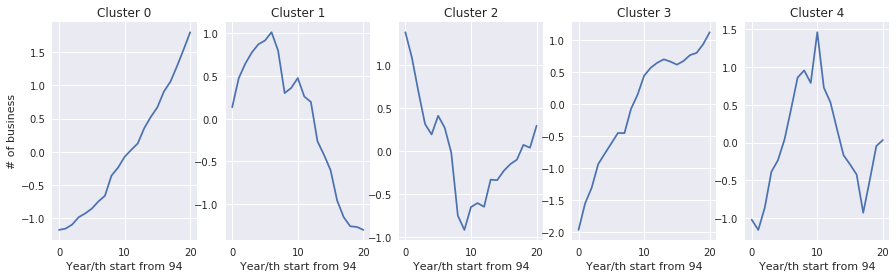

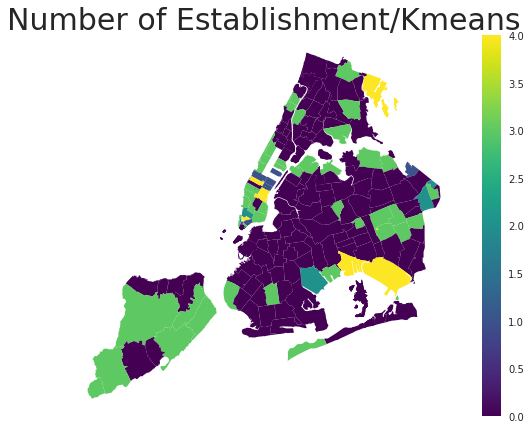

In [34]:
plt.figure(figsize=(15,4))
plt.subplot(1,5,1)
plt.plot(range(0,21),valsrmd0.iloc[:, 1:].mean())
plt.xlabel('Year/th start from 94')
plt.ylabel('# of business')
plt.title("Cluster 0")

plt.subplot(1,5,2)
plt.plot(range(0,21),valsrmd1.iloc[:, 1:].mean())
plt.xlabel('Year/th start from 94')
plt.title("Cluster 1")

plt.subplot(1,5,3)
plt.plot(range(0,21),valsrmd2.iloc[:, 1:].mean())
plt.xlabel('Year/th start from 94')
plt.title("Cluster 2")

plt.subplot(1,5,4)
plt.plot(range(0,21),valsrmd3.iloc[:, 1:].mean())
plt.xlabel('Year/th start from 94')
plt.title("Cluster 3")

plt.subplot(1,5,5)
plt.plot(range(0,21),valsrmd4.iloc[:, 1:].mean())
plt.xlabel('Year/th start from 94')
plt.title("Cluster 4")

fig = pl.figure(figsize=(40,7))
ax1 = fig.add_subplot(141)
ax1.set_title('Number of Establishment/Kmeans', fontsize=30)
nyczip.plot(column='label', cmap='viridis', ax=ax1, legend=True)
ax1.axis('off')


### Figure 1
The business pattern time series are plotted. It looks cluster 0,3 is growing area while those of 1, 2,4 are going down or stagnant. Comparing with figure2, the growth is reasonable as cluster 0 are residential area and there should be gentrifications so far. On the other hand, cluster 1 which is around Midtown shows huge drop.


### Figure 2: 
cloropleth of  cluster centers for 5 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. 
Apparently, many areas in Manhattan are in same cluster, and same thing happens in Brooklyn, Queen, Bronx and Staten. It looks residential ares are categorized as blue one.
However, I wonder why Downtown Brooklyn is clustered with other Brooklyn areas, which are not business districts.



### or maybe like this, depending on which algorithm you use, and how you proceed to preprocess your data and how you cluster it. There is no one correct answer, but general trends should be retrieved.

### DBSCAN

In [35]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=3, min_samples=2).fit(vals)

In [36]:
labelzipdb = pd.DataFrame(data=[db.labels_, vals.index.values],index=['label','ZIPCODE']).T


In [37]:
valsrmdb = pd.merge(labelzipdb,valsr,on='ZIPCODE')
valsrmddb = valsrmdb.drop('ZIPCODE',axis=1)
valsrmd_ = valsrmddb[(valsrmddb['label']==-1)]
valsrmd0 = valsrmddb[(valsrmddb['label']==0)]
valsrmd1 = valsrmddb[(valsrmddb['label']==1)]
valsrmd2 = valsrmddb[(valsrmddb['label']==2)]
valsrmd3 = valsrmddb[(valsrmddb['label']==3)]
valsrmd4 = valsrmddb[(valsrmddb['label']==4)]

In [38]:
nyczip = nyczipsshp.merge(labelzipdb, on='ZIPCODE')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


(905410.75604293647,
 1075212.5382562785,
 112386.35181947275,
 280345.45402395498)

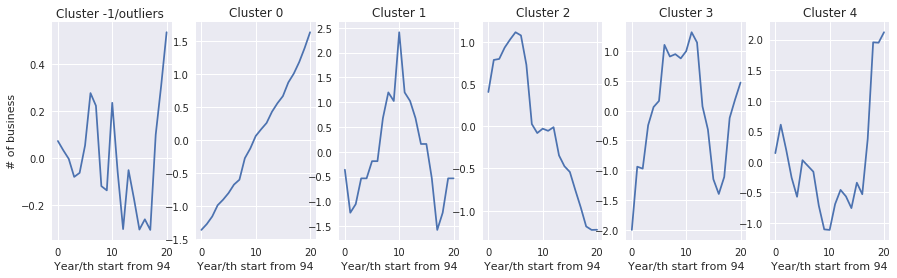

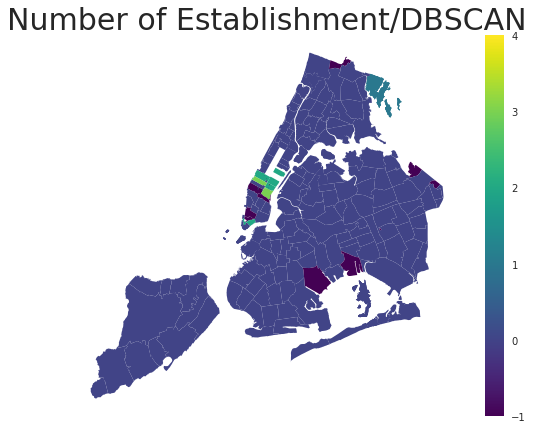

In [39]:
plt.figure(figsize=(15,4))

plt.subplot(1,6,1)
plt.plot(range(0,21),valsrmd_.iloc[:, 1:].mean())
plt.xlabel('Year/th start from 94')
plt.ylabel('# of business')
plt.title("Cluster -1/outliers ")

plt.subplot(1,6,2)
plt.plot(range(0,21),valsrmd0.iloc[:, 1:].mean())
plt.xlabel('Year/th start from 94')
plt.title("Cluster 0")

plt.subplot(1,6,3)
plt.plot(range(0,21),valsrmd1.iloc[:, 1:].mean())
plt.xlabel('Year/th start from 94')
plt.title("Cluster 1")

plt.subplot(1,6,4)
plt.plot(range(0,21),valsrmd2.iloc[:, 1:].mean())
plt.xlabel('Year/th start from 94')
plt.title("Cluster 2")

plt.subplot(1,6,5)
plt.plot(range(0,21),valsrmd3.iloc[:, 1:].mean())
plt.xlabel('Year/th start from 94')
plt.title("Cluster 3")

plt.subplot(1,6,6)
plt.plot(range(0,21),valsrmd4.iloc[:, 1:].mean())
plt.xlabel('Year/th start from 94')
plt.title("Cluster 4")

fig = pl.figure(figsize=(40,7))
ax1 = fig.add_subplot(141)
ax1.set_title('Number of Establishment/DBSCAN', fontsize=30)
nyczip.plot(column='label', cmap='viridis', ax=ax1, legend=True)
ax1.axis('off')


### Figure 3, 4
cloropleth of  cluster centers for DBSCAN clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster, and -1 is outliers. 
Most of the areas are 0, which is growing sharply. Most of cluster 0 areas are residential areas, where gentrification often happens. Cluster 2 (Downtown areas in Manhattan) shows down trend. Cluster 3 (Souther Midtown area) shows fluctuations. 


### Compare the results of the 2 algorithms (Kmeans, DBSCAN)

In both approaches, most of the residential areas are clustered in the same way, as growing areas. Also, in both, Northern Midtown(Down trend) and Southern Midtown(Up trend) are similary categorized. While Kmeans made 2 uptrend clusters in residential areas, DBSCAN made only 1. As both trends in K-means are quite same, I could reduce the number of cluster. The initial setting n_clusters would be wrong. Sklern for DBSCAN automatically decide the number of cluster. 




### attempt an interpretation. 
Most interpretation has been already discussed above. As the instruction says, it is a little bit risky to interprete the clustering graph. As K-means relies on the initial centroids, every time the result could change, which doesn't make sense when discussing about features of each areas. 
We could try to populate K-means graphs several times and compare with them to mitigate the problem above. 


# If you want to use agglomerative clustering

In [40]:
agc = AgglomerativeClustering(n_clusters=nc, linkage='average').fit()
labelsag = agc.labels_
centroidsag = np.zeros((nc, vals.shape[1]))



NameError: name 'AgglomerativeClustering' is not defined

### And if you use hierarchical clustering in scipy you can make a dandrogram it may look like this:

In [ ]:
import scipy.cluster as scp
fig = pl.figure(figsize=(20,10), dpi=150)
pl.ylabel("distance")
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(vals, method='ward'),
                               labels = zipcodes,
                               leaf_rotation=90.,  # rotates the x axis labels
                               leaf_font_size=8.)  # font size for the x axis labels)


In [ ]:
!pwd